## Construção do modelo utilizando o Fashion-MNIST database
https://keras.io/datasets/
```
```

Autor: Felipe Colombelli

Github: @colombelli

In [0]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Investigação das dimensões e tipo dos dados

print(type(x_train))
print(x_train.shape)

print(type(y_test))
print(y_train.shape)

print(type(x_test))
print(x_test.shape)

print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
<class 'numpy.ndarray'>
(10000, 28, 28)
<class 'numpy.ndarray'>
(10000,)


In [0]:
# Investigação de um dado específico

print(x_train[0])
print("\n\n~~~~~~~\n\n")
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

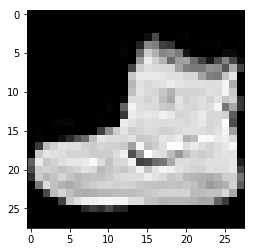

In [0]:
# Visualizando uma imagem qualquer dos dados

import matplotlib.pyplot as plt
plt.imshow(x_train[0], 'gray')

In [0]:
# Normalização dos dados

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
# Transformação das labels em One Hot Encoding 

y_train = tf.keras.utils.to_categorical(y_train, 10)     
y_test = tf.keras.utils.to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
# Design: 784 - 220, ReLU - 86, ReLU - 10, Softmax + Cross Entropy para loss

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  
model.add(tf.keras.layers.Dense(220, activation=tf.nn.relu))   
model.add(tf.keras.layers.Dense(86, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'], optimizer=opt)  

model.fit(x_train, y_train, epochs=5, batch_size=20)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.4720 - acc: 0.8269
Epoch 2/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3499 - acc: 0.8699
Epoch 3/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3128 - acc: 0.8823
Epoch 4/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2922 - acc: 0.8897
Epoch 5/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2714 - acc: 0.8976


In [0]:
# Avaliando performance do modelo nos dados de teste

val_loss, val_acc = model.evaluate(x_test, y_test)
print("\nLoss: ", val_loss, "\nAccuracy: ", val_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3311 - acc: 0.8787

Loss:  0.33113939695358274 
Accuracy:  0.8787


## k-Fold Cross Validation

Agradecimentos: Jeff Heaton 

```
```

Fontes:
- https://www.youtube.com/watch?v=maiQf8ray_s
- https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_05_2_kfold.ipynb

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np

# Objeto para separar os dados em k folds com o método .split()
k = 5
kf = KFold(k, shuffle=False) 

# Listas que guardarão os resultados de loss e accuracy a cada fold
losses = []
accs = []


x = x_train
y = y_train

In [0]:
# kf.split(x) irá dividir o nosso x nos k folds definidos,
# retornando os índices correspondentes a que dados devem
# ser utilizados como dados de treino, e que dados devem
# ser utilizados como dados de validação. Note que estamos
# divindindo em treino e validação as 60mil amostras de imagens
# separadas inicialmente para treino.

fold = 0
for train, validation in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
    
    # Pega os dados correspondentes destinados a treino e validação
    x_train = x[train]
    y_train = y[train]
    x_val = x[validation]
    y_val = y[validation]
    
    
    # Treina um novo modelo a cada fold.
    # Esta parte poderia ser utilizada para treinar modelos diferentes também
    # e realizar hyperparameter tuning, ou seja, encontrar melhor valores de
    # neurônios, camadas, learning rate, ativações, etc. Ou ainda estimar o 
    # melhor número de epochs para evitar overfitting
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())  
    model.add(tf.keras.layers.Dense(220, activation=tf.nn.relu))   
    model.add(tf.keras.layers.Dense(86, activation=tf.nn.relu)) 
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',
                 metrics=['accuracy'], optimizer=opt)  
    
    model.fit(x_train, y_train, epochs=1, batch_size=20)

  
    # Métricas do fold (loss e accuracy)
    fold_loss, fold_acc = model.evaluate(x_val, y_val)
    print(f"Fold loss: {fold_loss}")
    print(f"Fold accuraccy: {fold_acc}\n\n")
    
    # Guardamos estas métricas para posteriormente avaliá-las
    losses.append(fold_loss)
    accs.append(fold_acc)


Fold #1
Train on 38400 samples
9600/9600 [==============================] - 1s 71us/sample - loss: 0.3980 - acc: 0.8554
Fold loss: 0.39797454059123993
Fold accuraccy: 0.8554166555404663


Fold #2
Train on 38400 samples
9600/9600 [==============================] - 1s 73us/sample - loss: 0.4222 - acc: 0.8466
Fold loss: 0.42218851620952286
Fold accuraccy: 0.8465625047683716


Fold #3
Train on 38400 samples
9600/9600 [==============================] - 1s 73us/sample - loss: 0.4019 - acc: 0.8523
Fold loss: 0.4018646999200185
Fold accuraccy: 0.8522916436195374


Fold #4
Train on 38400 samples
9600/9600 [==============================] - 1s 73us/sample - loss: 0.4092 - acc: 0.8479
Fold loss: 0.4091868011156718
Fold accuraccy: 0.8479166626930237


Fold #5
Train on 38400 samples
9600/9600 [==============================] - 1s 80us/sample - loss: 0.3895 - acc: 0.8552
Fold loss: 0.3894586065908273
Fold accuraccy: 0.8552083373069763




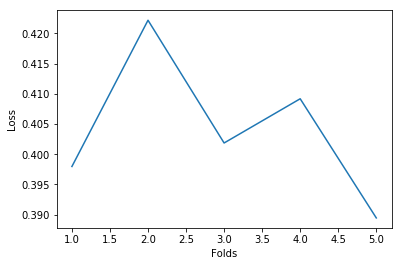

In [0]:
# Plot do loss a cada fold

folds = list(range(1, k+1))
plt.plot(folds, losses, label='Loss')
plt.ylabel('Loss')
plt.xlabel('Folds')
plt.show()

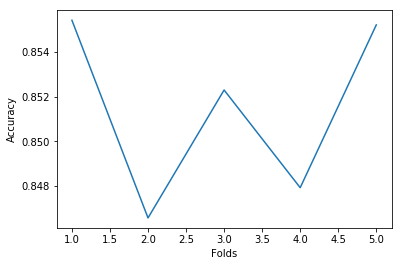

In [0]:
# Plot da accuracy a cada fold

folds = list(range(1, k+1))
plt.plot(folds, accs, label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.show()

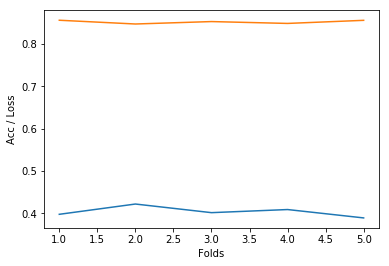

In [0]:
# Plot tanto do loss quanto da accuracy de cada fold no mesmo gráfico.
# Isso pode ser útil para não se enganar com as escalas e achar que existem
# outliers nos dados.

folds = list(range(1, k+1))
plt.plot(folds, losses, label='Loss')
plt.plot(folds, accs, label='Accuracy')
plt.ylabel('Acc / Loss')
plt.xlabel('Folds')
plt.show()